# Numpy의 polyfit으로 회귀 분석하기 

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader import data
import numpy as np
# 페이스북에서 개발한 시계열(시간의 흐름에 따라 관측된 자료) 예측 패키지
# conda install -c conda-forge pystan
from fbprophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import platform

# - 깨짐 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 깨짐 방지
if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows' ):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else: 
    print('error')

Importing plotly failed. Interactive plots will not work.


In [2]:
pweb = pd.read_csv('DS/data/08. PinkWink Web Traffic.csv', encoding='utf-8', thousands=',', 
                names = ['date', 'hit'],
                index_col=0)

pweb = pweb[pweb['hit'].notnull()]
print(pweb.head())
print(pweb.tail())

             hit
date            
16. 7. 1.  766.0
16. 7. 2.  377.0
16. 7. 3.  427.0
16. 7. 4.  902.0
16. 7. 5.  850.0
               hit
date              
17. 6. 26.  1309.0
17. 6. 27.  1436.0
17. 6. 28.  1387.0
17. 6. 29.  1328.0
17. 6. 30.  1193.0


<AxesSubplot:xlabel='date'>

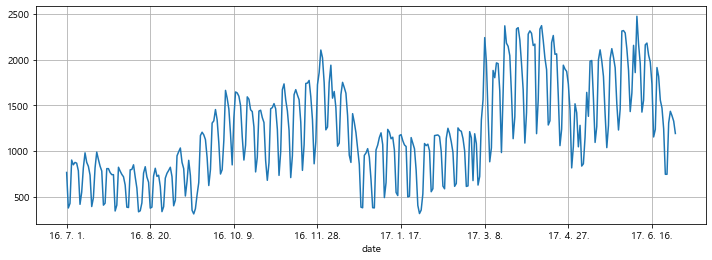

In [3]:
pweb['hit'].plot(figsize=(12,4), grid=True)

In [4]:
time = np.arange(0, len(pweb)) # 시간(time) 축 생성(0~364)
traffic = pweb['hit'].values # 웹 트래픽 변수 저장
fx = np.linspace(0, time[-1], 1000)
print(fx)

[  0.           0.36436436   0.72872873   1.09309309   1.45745746
   1.82182182   2.18618619   2.55055055   2.91491491   3.27927928
   3.64364364   4.00800801   4.37237237   4.73673674   5.1011011
   5.46546547   5.82982983   6.19419419   6.55855856   6.92292292
   7.28728729   7.65165165   8.01601602   8.38038038   8.74474474
   9.10910911   9.47347347   9.83783784  10.2022022   10.56656657
  10.93093093  11.2952953   11.65965966  12.02402402  12.38838839
  12.75275275  13.11711712  13.48148148  13.84584585  14.21021021
  14.57457457  14.93893894  15.3033033   15.66766767  16.03203203
  16.3963964   16.76076076  17.12512513  17.48948949  17.85385385
  18.21821822  18.58258258  18.94694695  19.31131131  19.67567568
  20.04004004  20.4044044   20.76876877  21.13313313  21.4974975
  21.86186186  22.22622623  22.59059059  22.95495495  23.31931932
  23.68368368  24.04804805  24.41241241  24.77677678  25.14114114
  25.50550551  25.86986987  26.23423423  26.5985986   26.96296296
  27.3273273

In [5]:
# Mean Squered Error (평균제곱 오차)
# 오차 = ( 예측값 - 실제값 ) ** 2
def error(f, x, y): 
    return np.sqrt(np.mean((f(x)-y)**2))

In [6]:
# polyfit(x,y,n) 입력과 출력 값으로 부터 다항식의 계수를 찾아주는 함수
fp1 = np.polyfit(time, traffic, 1) # 다항식 입력값 x, y 1차
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2) # 다항식 입력값 x, y 2차
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3) # 다항식 입력값 x, y 3차
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15) # 다항식 입력값 x, y 15차
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.62841018946943
429.5328046676293
330.4777305592128


In [7]:
print(f1, fp1)
print(f2, f2p)
print(f3, f3p)

 
2.948 x + 678.4 [  2.94751137 678.39950595]
           2
-0.001422 x + 3.465 x + 647.1 [-1.42164283e-03  3.46498936e+00  6.47092087e+02]
           3           2
3.341e-05 x - 0.01966 x + 6.117 x + 567.2 [ 3.34072153e-05 -1.96619824e-02  6.11714142e+00  5.67195752e+02]


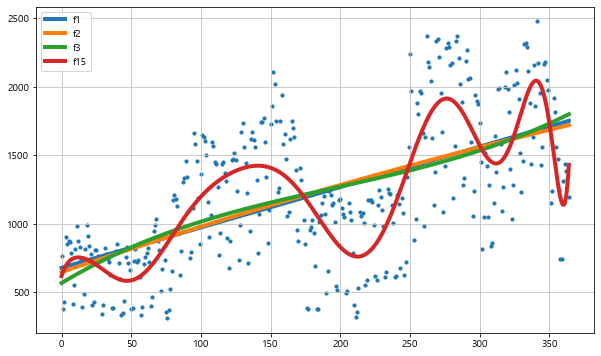

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

In [9]:
df = pd.DataFrame({'ds':pweb.index, 'y':pweb['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
df.head()

,date,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0


In [10]:
df.drop('date', axis=1, inplace=True)
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [11]:
# Prophet() 함수 사용시
# 주기성이 연단위(yearly_seasonality) 및 일단위(daily_seasonality)가 있다.
# Prophet 클래스 객체를 만들고 시계열 데이터를 입력으로 fit 메서드를 호출한다.
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [12]:
# 16. 7. 1. ~ 17. 6. 30. 홈페이지 방문자수
# make_future_dataframe : 예측날짜 구간 생성
future = m.make_future_dataframe(periods=60) # 60일
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [13]:
# yhat = 예측값, lower/upper :예측 하한/상한
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,684.400992,1108.378250
421,2017-08-26,481.544412,271.216377,695.473023
422,2017-08-27,614.212001,401.237159,815.023856
423,2017-08-28,1166.966207,969.150162,1377.559574
424,2017-08-29,1203.000155,979.910809,1410.162948


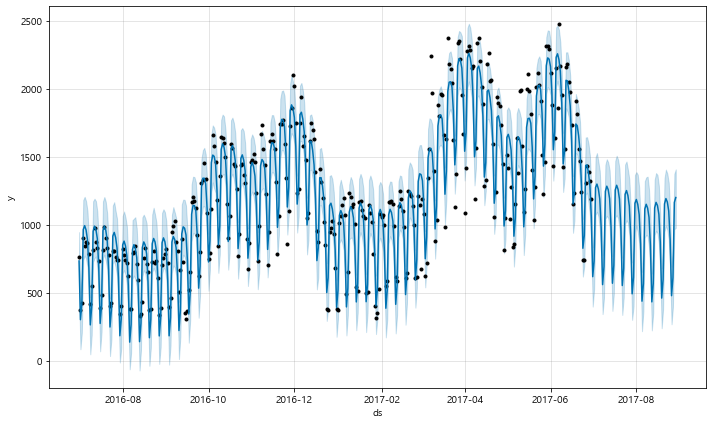

In [14]:
m.plot(forecast);

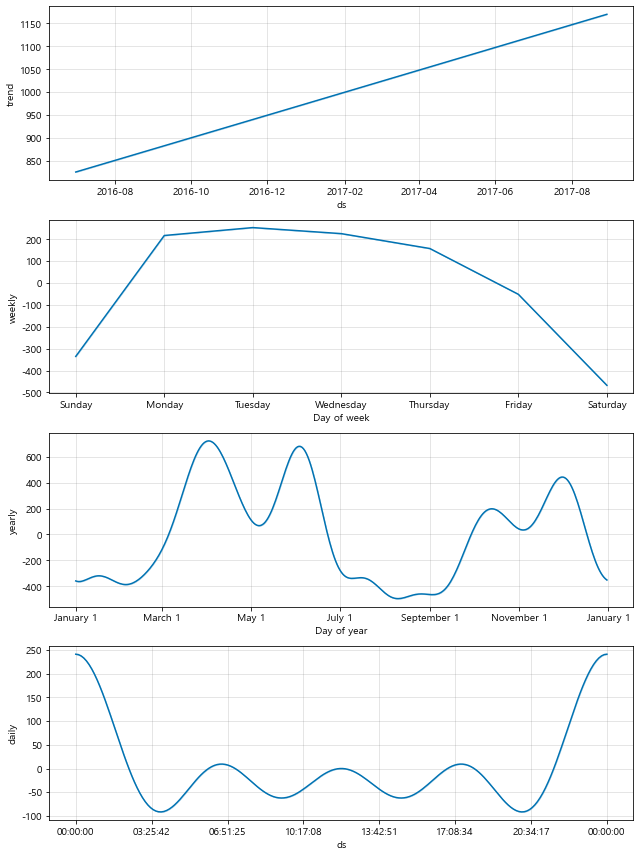

In [15]:
# plot_components : 선형회귀 및 계절성 성분별로 분리
m.plot_components(forecast);

# Seasonal 시계열 분석으로 주식 데이터 분석하기

In [16]:
# yahoo
start = datetime(2020, 1, 1)
end = datetime(2020, 6, 2)

# High = 고가, low = 저가, Open = 시(작)가, Close = 종가, Volume = 거래량, Adj Close = 조정한 증가
#df = data.get_data_yahoo('^KS11', start, end) # KOSPI 지수
df = data.DataReader('^KS11', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,2202.320068,2171.840088,2201.209961,2175.169922,494700,2175.169922
2020-01-03,2203.379883,2165.389893,2192.580078,2176.459961,631600,2176.459961
2020-01-06,2164.419922,2149.949951,2154.969971,2155.070068,592700,2155.070068
2020-01-07,2181.620117,2164.270020,2166.600098,2175.540039,568200,2175.540039
2020-01-08,2162.320068,2137.719971,2156.270020,2151.310059,913800,2151.310059


In [17]:
# 먼저 본 그래프를 의도적으로 잘라 실제 그래프와 예측 그래프를 비교하기 위해 
# 일정 시점에서 데이터프레임을 잘라 예측 
start_date = '2009-7-1'
end_date = '2019-7-31'
SAM = data.get_data_yahoo('005930.KS', start_date, end_date) # 삼성
SAM_trunc = SAM[:'2017-6-30']
SAM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12120.0,11800.0,11880.0,12060.0,14641400.0,9515.540039
2009-07-02,12200.0,12000.0,12200.0,12040.0,12677100.0,9499.761719
2009-07-03,12040.0,11880.0,11900.0,12020.0,11348350.0,9483.978516
2009-07-06,12820.0,12180.0,12200.0,12680.0,46675200.0,10004.731445
2009-07-07,13120.0,12860.0,12980.0,13000.0,30934250.0,10257.216797


In [18]:
print(pd.__version__)

1.3.5


In [19]:
start_date = '2009-1-1'
end_date = '2019-3-26'
KAKAO = data.get_data_yahoo('035720.KS', start_date, end_date)
KAKAO_trunc = KAKAO[:'2017-12-31']
KAKAO.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,6477.284180,6044.122070,6406.769531,6044.122070,1372005.0,5703.414062
2009-01-05,6225.445801,5983.680664,6114.636719,6023.975098,823047.0,5684.400879
2009-01-06,6275.813477,6034.048340,6064.269043,6195.225098,1015685.0,5845.998535
2009-01-07,6537.725586,6205.298828,6275.813477,6537.725586,1236963.0,6169.192871
2009-01-08,6497.431152,6316.107422,6396.695801,6416.842773,892367.0,6055.124023


In [20]:
start = datetime(2009,7,1)
end = datetime(2009,7,31)
KIA = web.DataReader('000270.KS', 'yahoo', start, end)
KIA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12650,12250,12550,12450,5925870,9660.940430
2009-07-02,12900,12600,12750,12700,4636681,9854.936523
2009-07-03,13000,12400,12400,13000,3944184,10087.728516
2009-07-06,13500,12800,13050,13500,6033774,10475.718750
2009-07-07,14000,13300,13450,13900,8125407,10786.109375


<AxesSubplot:xlabel='Date'>

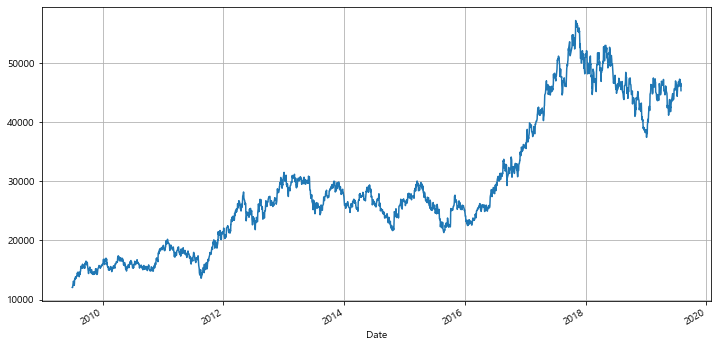

In [21]:
SAM['Close'].plot(figsize=(12,6), grid=True)

In [22]:
df = pd.DataFrame({'ds':SAM_trunc.index, 'y':SAM_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
# df.drop('Date', axis=1, inplace=True)
df.head

<bound method NDFrame.head of              ds        y
0    2009-07-01  12060.0
1    2009-07-02  12040.0
2    2009-07-03  12020.0
3    2009-07-06  12680.0
4    2009-07-07  13000.0
...         ...      ...
1980 2017-06-26  48280.0
1981 2017-06-27  48300.0
1982 2017-06-28  47700.0
1983 2017-06-29  47940.0
1984 2017-06-30  47540.0

[1985 rows x 2 columns]>

In [23]:
# 주기성 일단위(daily_seasonality=True)로 있다고 입력
m = Prophet(daily_seasonality=True)
m.fit(df)

In [24]:
# 1년(365일) 후 주가를 예측
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2345,2018-06-26
2346,2018-06-27
2347,2018-06-28
2348,2018-06-29
2349,2018-06-30


In [25]:
forecase = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,684.400992,1108.378250
421,2017-08-26,481.544412,271.216377,695.473023
422,2017-08-27,614.212001,401.237159,815.023856
423,2017-08-28,1166.966207,969.150162,1377.559574
424,2017-08-29,1203.000155,979.910809,1410.162948


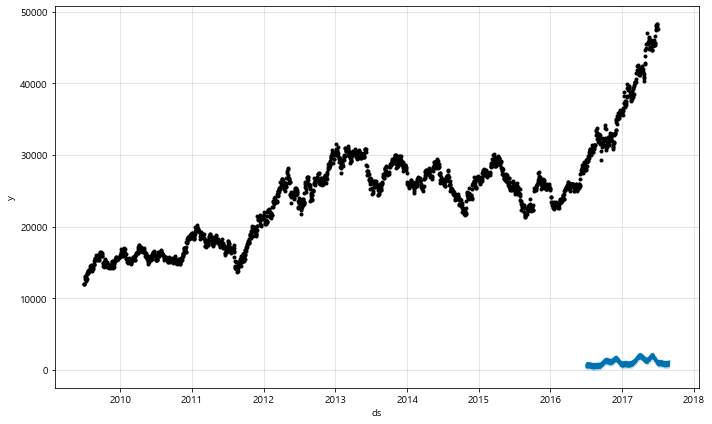

In [26]:
m.plot(forecast);

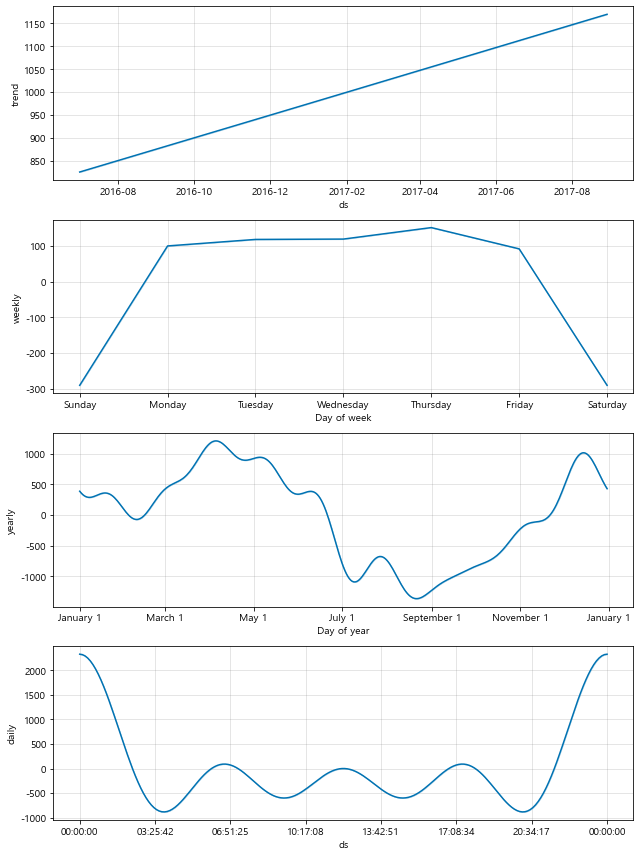

In [27]:
m.plot_components(forecast);

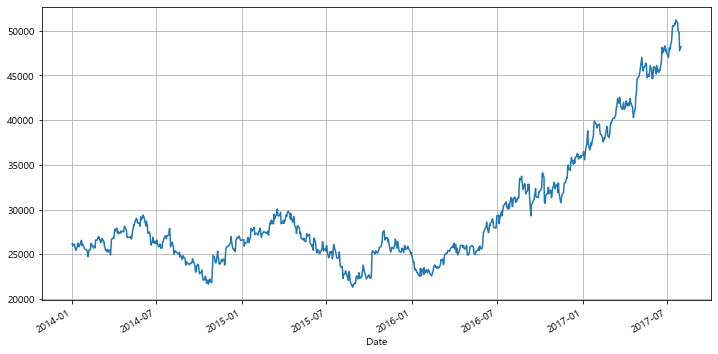

In [36]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
SAM = data.get_data_yahoo('005930.KS', start_date, end_date)
SAM['Close'].plot(figsize=(12,6), grid=True);

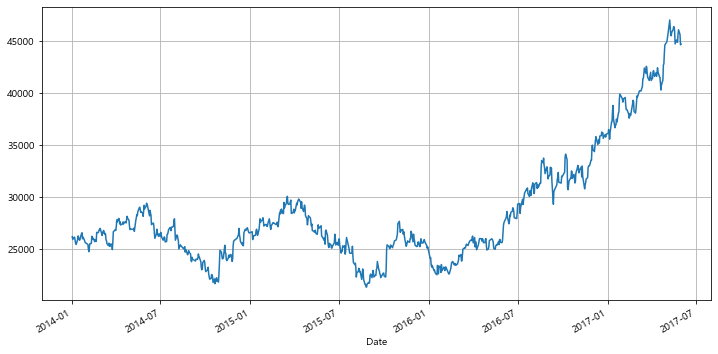

In [37]:
#일부 데이터를 잘라서 forecast를 수행 ==>  '2014-1-1'  ~ '2017-7-31'
SAM_trunc = SAM[:'2017-05-31']
SAM_trunc['Close'].plot(figsize=(12,6), grid=True);

In [45]:
df = pd.DataFrame({'ds':SAM_trunc.index, 'y':SAM_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
# df.drop('Date', axis=1, inplace=True)
df.head

<bound method NDFrame.head of             ds        y
0   2014-01-02  26180.0
1   2014-01-03  25920.0
2   2014-01-06  26140.0
3   2014-01-07  26080.0
4   2014-01-08  25820.0
..         ...      ...
836 2017-05-25  45680.0
837 2017-05-26  46080.0
838 2017-05-29  45620.0
839 2017-05-30  44640.0
840 2017-05-31  44700.0

[841 rows x 2 columns]>

In [47]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [48]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


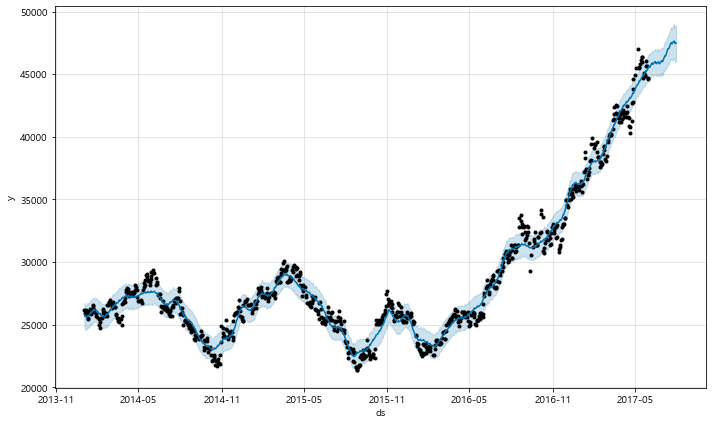

In [49]:
forecast = m.predict(future)
m.plot(forecast);

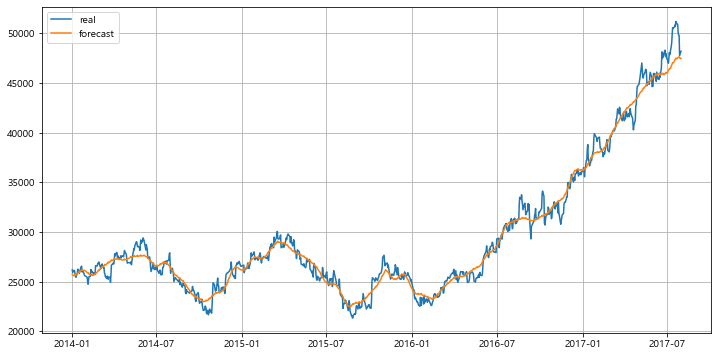

In [50]:
plt.figure(figsize=(12,6))
plt.plot(SAM.index, SAM['Close'], label='real')
plt.plot(forecast['ds'],  forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [52]:
df = pd.read_csv('DS/data/08. example_wp_R.csv')
df['y'] = np.log(df['y']) # y값에 log 
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [55]:
df['cap'] = 8.5 # 상한가
df['floor'] = 6 # 하한가
df


,ds,y,cap,floor
0,2008-01-30,5.976351,8.5,6
1,2008-01-16,6.049733,8.5,6
2,2008-01-17,6.011267,8.5,6
3,2008-01-14,5.953243,8.5,6
4,2008-01-15,5.910797,8.5,6
...,...,...,...,...
2858,2015-12-11,7.834788,8.5,6
2859,2015-12-12,7.360104,8.5,6
2860,2015-12-13,7.479864,8.5,6
2861,2015-12-18,7.765145,8.5,6


In [ ]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

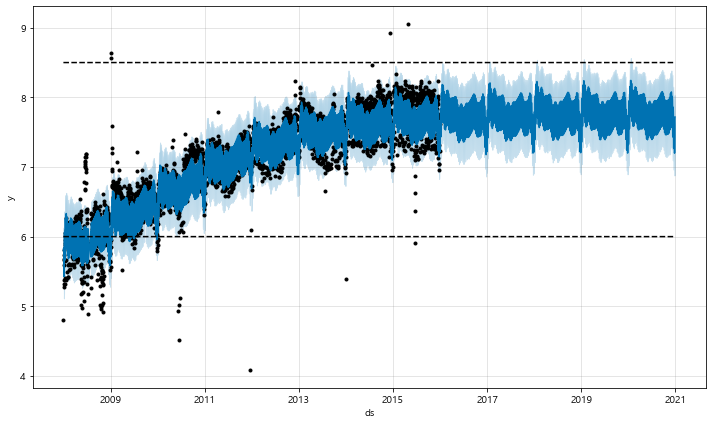

In [54]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
future['floor'] = 6
fcst = m.predict(future)
m.plot(fcst);

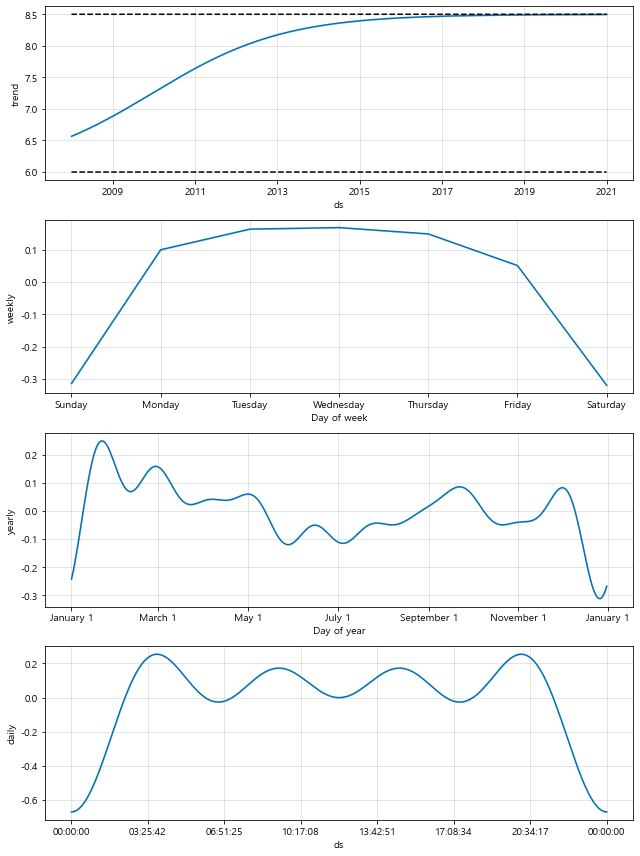

In [56]:
m.plot_components(fcst);